<a href="https://colab.research.google.com/github/TACH00/Examen1/blob/main/LastMile_Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [2]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Convertir en Dataframe
df=pd.read_csv('lastmile_delivery_operations_mit_lift_lab.csv')
df.head()

In [6]:
#Verificamos información del DataFrame para reconocer las variables que son cuantitativas y cualitativas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     182 non-null    object 
 1   _title                                         176 non-null    object 
 2   _server_updated_at                             182 non-null    object 
 3   _updated_by                                    182 non-null    object 
 4   _geometry                                      182 non-null    object 
 5   _latitude                                      182 non-null    float64
 6   _longitude                                     182 non-null    float64
 7   arrival_of_the_freight_vehicle                 182 non-null    object 
 8   plates                                         181 non-null    object 
 9   company_if_visible                             109 non

In [ ]:
#Filtro por columnas, de acuerdo a la información obtenida arriba obtenemos las cuantitativas (22,25 y 28 se eliminan por la cantidad de datos que hay)
cuant=df.iloc[ : , [5,6,12,21]]  #columnas no consecutivas 
cuant

In [8]:
cuant.info() #Verificamos que los datos correspondan al tipo entero o float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _latitude                     182 non-null    float64
 1   _longitude                    182 non-null    float64
 2   number_of_operators           182 non-null    int64  
 3   number_of_available_trolleys  182 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 5.8 KB


In [9]:
#Filtro por columnas, de acuerdo a la información obtenida arriba obtenemos las cualitativas
cual=df.iloc[ : , [0,1,2,3,4,7,8,9,10,11,13,14,15,16,17,18,19,20,23,24,26,27]]

In [10]:
cual.info() #Verificamos que entre los datos no hayan cuantitativos y que la suma de ambos nuevos subdf de el total del df original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   _record_id                             182 non-null    object
 1   _title                                 176 non-null    object
 2   _server_updated_at                     182 non-null    object
 3   _updated_by                            182 non-null    object
 4   _geometry                              182 non-null    object
 5   arrival_of_the_freight_vehicle         182 non-null    object
 6   plates                                 181 non-null    object
 7   company_if_visible                     109 non-null    object
 8   visit_purpose                          182 non-null    object
 9   type_of_vehicle                        182 non-null    object
 10  refrigerated_truck                     182 non-null    object
 11  type_of_cargo      

In [12]:
#Imprimo todas las columnas que aun contienen nulos para analizarla y así determinar que metodo de sustitución ocupar
cual1=cual.iloc[ : , [1,6,7]]  #columnas no consecutivas 
cual1

,_title,plates,company_if_visible
0,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,KB-7050-A,Ricolino
1,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,XC8687A,Marinela
2,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,SM 20745,La fete
3,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,SP35169,Barcel
4,4717 Avenida Reforma\nHeroica Puebla de Zarago...,SN89460,NaN
...,...,...,...
177,NaN,HL-3785-F,NaN
178,NaN,SP-29-798,NaN
179,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,05-AP-6G,Infra
180,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,LE-88-707,Alpura


In [ ]:
#A sabiendas que son de diferentes tipos de texto pero por lo general son registros que se hacen de manera casi simultanea, lo mejor para agilizar este caso 
#sería sustituir con el metodo de bfill o ffill
cual["_title"]=cual["_title"].fillna(method="ffill")
cual["plates"]=cual["plates"].fillna(method="bfill")
cual["company_if_visible"]=cual["company_if_visible"].fillna(method="ffill")

In [17]:
#Vamos verificando que los reaultados sean correctos, marcando todos los valores como no nulos o marcando 0 nulos con .info() o identificación de nulos respect.
#cual.info()
#Identificar valores nulos por columna
valores_nulos=cual.isnull().sum()
valores_nulos

_record_id                               0
_title                                   0
_server_updated_at                       0
_updated_by                              0
_geometry                                0
arrival_of_the_freight_vehicle           0
plates                                   0
company_if_visible                       0
visit_purpose                            0
type_of_vehicle                          0
refrigerated_truck                       0
type_of_cargo                            0
picture_of_the_parked_freight_vehicle    0
departure_of_the_freight_vehicle         0
where_was_the_vehicle_parked             0
while_parked_was_the_engine_running      0
used_traffic_cone                        0
vehicles_unloading_door                  0
garage_blocking                          0
accident                                 0
noise                                    0
traffic_congestion                       0
dtype: int64

De esta manera quedaron listas las columnas sin nulos, ahora se aplicara a las cuantitativas

In [18]:
cuant.info()
#Con esto corroboramos que no hay ningun valor nulo en las columnas cuantitativas, por lo que ahora procederemos a identificar los outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _latitude                     182 non-null    float64
 1   _longitude                    182 non-null    float64
 2   number_of_operators           182 non-null    int64  
 3   number_of_available_trolleys  182 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 5.8 KB


In [20]:
cuant.head()
#De acuerdo a la información que nos presenta, solo a la lalitud y longitud no le podremos aplicar outliers pues ya que estos debemos estar concientes
#que dentro del rango que estan, pueden variar ya que estamos tomando la información en puntos posiblemente muy diferentes de la ciudad
#y también creo que desde un inicio podemos determinar que no habrá Outliers en estos casos

,_latitude,_longitude,number_of_operators,number_of_available_trolleys
0,19.056893,-98.233489,1,1
1,19.056849,-98.233484,2,1
2,19.059677,-98.233916,1,0
3,19.062695,-98.228567,1,2
4,19.062724,-98.231397,2,2


In [22]:
#Filtro por columnas dejando fuera las 2 mencionadas anteriormente
cuant1=cuant.iloc[ : , 2:4]
cuant1

,number_of_operators,number_of_available_trolleys
0,1,1
1,2,1
2,1,0
3,1,2
4,2,2
...,...,...
177,1,0
178,1,0
179,1,1
180,2,0


<Figure size 1080x576 with 0 Axes>

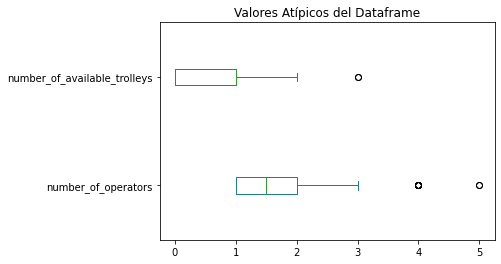

In [24]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuant1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama y nos damos cuenta que si se presentan outliers por ello era importante seguir con el analisis

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos || Use este metodo ya que estamos hablando de valores de la vida real por lo que de
#antemano sabemos que deben o pueden variar mucho entre sí y para tener una mayor consideración con el número final de datos ya que son muy pequeños también
#como podemos observar en el eje de las x
y=cuant1
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido: ", Limite_Superior)
print("Limite inferior permitido: ", Limite_Inferior)

In [ ]:
#Encontramos Ouliers del Dataframe
outliers=cuant1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
cuant2= cuant1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuant2

In [29]:
#Corroboramos valores nulos del dataframe4 || Observamos que son pocos gracias a la tecnica de desviación, por lo que ahora sería bueno sustituir con medidas
#de tendencia central para garantizar que no haya sesgos importantes en las mismas
valores_nulos=cuant2.isnull().sum()
valores_nulos

number_of_operators             2
number_of_available_trolleys    2
dtype: int64

In [30]:
#Sustituir valores nulos con promedio o mediana
cuant2["number_of_operators"]=cuant2["number_of_operators"].fillna(round(cuant2["number_of_operators"].mean(),1))
cuant2["number_of_available_trolleys"]=cuant2["number_of_available_trolleys"].fillna(round(cuant2["number_of_available_trolleys"].mean(),1))

In [31]:
valores_nulos=cuant2.isnull().sum()
valores_nulos

number_of_operators             0
number_of_available_trolleys    0
dtype: int64

In [ ]:
#Filtro por columnas
faltantes=cuant.iloc[ : , [0,1]]
faltantes

In [33]:
# Unimos las columnas faltantes con el dataframe de cuantitativas para hacerlo limpio
cuantitativas= pd.concat([faltantes, cuant2], axis=1)
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _latitude                     182 non-null    float64
 1   _longitude                    182 non-null    float64
 2   number_of_operators           182 non-null    float64
 3   number_of_available_trolleys  182 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [35]:
ConsumerLimpio= pd.concat([cuantitativas, cual], axis=1)
ConsumerLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   _latitude                              182 non-null    float64
 1   _longitude                             182 non-null    float64
 2   number_of_operators                    182 non-null    float64
 3   number_of_available_trolleys           182 non-null    float64
 4   _record_id                             182 non-null    object 
 5   _title                                 182 non-null    object 
 6   _server_updated_at                     182 non-null    object 
 7   _updated_by                            182 non-null    object 
 8   _geometry                              182 non-null    object 
 9   arrival_of_the_freight_vehicle         182 non-null    object 
 10  plates                                 182 non-null    object 
 11  compan

Nuevamente el dataframe ya no tiene el mismo tamaño pues recordemos que eliminamos 3 variables que no eran relevantes por su tamaño e información

In [36]:
#Corroboramos valores nulos en todo el dataframe
valores_nulos=ConsumerLimpio.isnull().sum().sum()
valores_nulos

0

In [37]:
#Convertir DataFrame a CSV
ConsumerLimpio.to_csv("LastMileLimpio.csv")

In [38]:
#descargar archivo filtrado en csv
from google.colab import files 
files.download("LastMileLimpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>